In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
cifar10 = keras.datasets.cifar10
(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

print(X_train0.shape, y_train0.shape, X_test0.shape, y_test0.shape)

170500096/170498071 [==============================] - 1109s 7us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


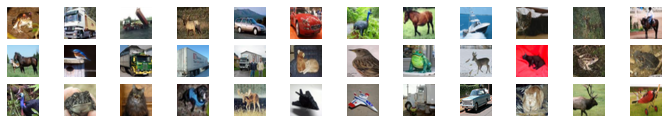

In [4]:
import matplotlib.pylab as plt

plt.figure(figsize=(12, 2))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i])
    plt.axis("off")
plt.show()

In [5]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) uint8


In [6]:
X_train = X_train0.reshape(50000, 3072).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 3072).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(50000, 3072) float32


In [7]:
y_train0[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

#tf.random.set_seed(0)

model = Sequential()
model.add(Dense(15, input_dim=3072, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                46095     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 46,255
Trainable params: 46,255
Non-trainable params: 0
_________________________________________________________________


In [12]:
%%time
hist = model.fit(X_train, Y_train,
                 epochs=50, batch_size=100,
                 validation_data=(X_test, Y_test),
                 verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 - 2s - loss: 0.0891 - accuracy: 0.2081 - val_loss: 0.0889 - val_accuracy: 0.2161
Epoch 2/50
50000/50000 - 2s - loss: 0.0887 - accuracy: 0.2124 - val_loss: 0.0885 - val_accuracy: 0.2213
Epoch 3/50
50000/50000 - 3s - loss: 0.0884 - accuracy: 0.2209 - val_loss: 0.0882 - val_accuracy: 0.2220
Epoch 4/50
50000/50000 - 3s - loss: 0.0880 - accuracy: 0.2242 - val_loss: 0.0878 - val_accuracy: 0.2298
Epoch 5/50
50000/50000 - 2s - loss: 0.0876 - accuracy: 0.2286 - val_loss: 0.0874 - val_accuracy: 0.2326
Epoch 6/50
50000/50000 - 4s - loss: 0.0873 - accuracy: 0.2339 - val_loss: 0.0870 - val_accuracy: 0.2391
Epoch 7/50
50000/50000 - 2s - loss: 0.0869 - accuracy: 0.2426 - val_loss: 0.0866 - val_accuracy: 0.2571
Epoch 8/50
50000/50000 - 2s - loss: 0.0864 - accuracy: 0.2588 - val_loss: 0.0862 - val_accuracy: 0.2664
Epoch 9/50
50000/50000 - 2s - loss: 0.0860 - accuracy: 0.2680 - val_loss: 0.0858 - val_accuracy: 0.2748
Epoch 10/50
50

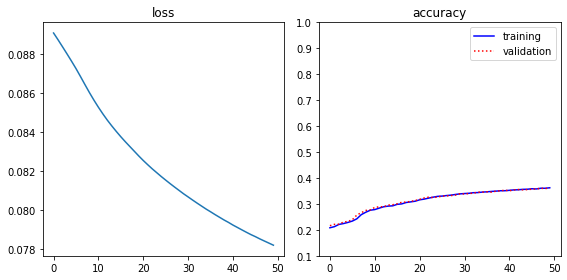

In [13]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.ylim(0.1,1)
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()